### Aksil IRBOUH - Student ID : 52200124019
### Hayal AHLAT - Student ID : 52200124018


# Natural Language Processing - Text Sentiment Analysis - Pattern Recognition Project

# Part 1 - Detecting sarcasm in a sentence

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


--2025-01-17 07:35:02--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 74.125.141.207, 173.194.210.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2025-01-17 07:35:02 (96.8 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [5]:
with open("/tmp/sarcasm.json", 'r') as f:  #We load the sarcasm json file using the json library
    datastore = json.load(f)

sentences = []   #We create lists for the headlines and the labels, we don't use urls
labels = []

for item in datastore:                    #We iterate through the json by loading the requisite values into a Python list
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [6]:
training_sentences = sentences[0:training_size]  #Seperating training and testing sets using Python list slicing
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) #We start the preprocessing on the text
tokenizer.fit_on_texts(training_sentences)    #We create tokens for every word in the training corpus

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)  #We turn our sentences into sequences of tokens
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)  #We pad them to the same length

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)  #We do the same for our testing sentences
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [8]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [9]:
model = tf.keras.Sequential([  #Creation of our Neural Network
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), #The top layer is an embedding where the direction of each word will be learned epoch by epoch
    tf.keras.layers.GlobalAveragePooling1D(),  #We pool, it means we add up the vectors
    tf.keras.layers.Dense(24, activation='relu'), #We feed it into a Deep Neural Network
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
num_epochs = 30  #We train our model
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - 7ms/step - accuracy: 0.5612 - loss: 0.6819 - val_accuracy: 0.5633 - val_loss: 0.6681
Epoch 2/30
625/625 - 4s - 6ms/step - accuracy: 0.6859 - loss: 0.5934 - val_accuracy: 0.7936 - val_loss: 0.4944
Epoch 3/30
625/625 - 2s - 3ms/step - accuracy: 0.8130 - loss: 0.4300 - val_accuracy: 0.7974 - val_loss: 0.4308
Epoch 4/30
625/625 - 1s - 2ms/step - accuracy: 0.8457 - loss: 0.3619 - val_accuracy: 0.8356 - val_loss: 0.3826
Epoch 5/30
625/625 - 1s - 2ms/step - accuracy: 0.8637 - loss: 0.3229 - val_accuracy: 0.7986 - val_loss: 0.4234
Epoch 6/30
625/625 - 1s - 2ms/step - accuracy: 0.8766 - loss: 0.2961 - val_accuracy: 0.8174 - val_loss: 0.3930
Epoch 7/30
625/625 - 1s - 2ms/step - accuracy: 0.8851 - loss: 0.2775 - val_accuracy: 0.8542 - val_loss: 0.3467
Epoch 8/30
625/625 - 1s - 2ms/step - accuracy: 0.9017 - loss: 0.2487 - val_accuracy: 0.8441 - val_loss: 0.3534
Epoch 9/30
625/625 - 1s - 2ms/step - accuracy: 0.8972 - loss: 0.2493 - val_accuracy: 0.8484 - val_loss: 0.3535
E

We have 96% accuracy for our training data and 84% for our testing set.

In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 100, 16)               │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (32, 16)                    │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 24)                    │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 1)                     │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481,301 (1.84 MB)

 Trainable params: 160,433 (626.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,868 (1.22 MB)

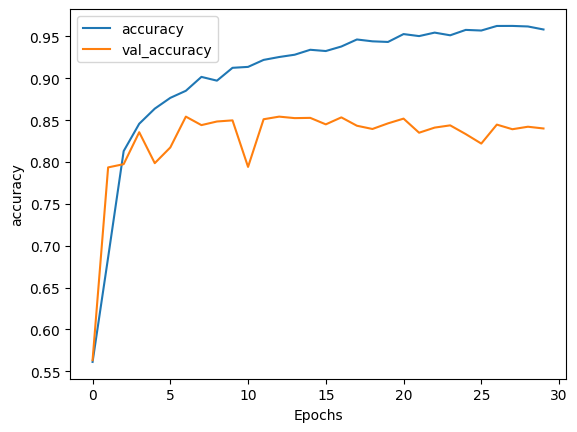

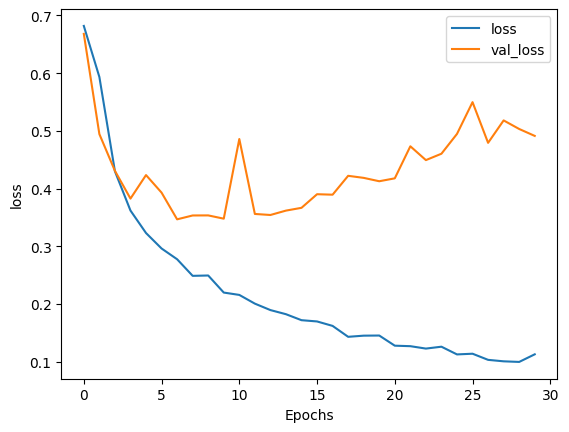

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [13]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [14]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [15]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [16]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#Now we can predict the sarcasm of our own sentences

sentence = ["Sure, because binge-watching TV shows totally counts as exercise.", "Attack On Titan season finale showing this sunday night at cinema."]
sequences = tokenizer.texts_to_sequences(sentence) #We use the tokenizer we created earlier to convert our 2 sentences to sequences
#The words will have the same tokens as the training set
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type) #We pad the sequences to have the same dimensions as the training set
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
[[0.8126143 ]
 [0.00494673]]


# Part 2 - Restaurant review

In [18]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124


In [19]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [20]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification  #A tokenizer is going pass through a string and convert it into a sequence of numbers
import torch
import requests  #used to grab the data from Yelp website
from bs4 import BeautifulSoup
import re #regex function to extract comments that we want

In [21]:
#Initialization of our Model

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')  #loading of our pretrained model

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [22]:
#Calculation of Sentiment

tokens = tokenizer.encode("Exceptionnel", return_tensors='pt') #We replace our comment here

In [23]:
result = model(tokens)  #The output from the model is a one-hot encoding list of scores.

In [24]:
result.logits  #The position with the highest scores represent the sentiment rating. Here 2.0598 is the highest number so we return its position in the list which is 4

tensor([[-1.3173, -1.5337, -0.2490,  0.8201,  2.0598]],
       grad_fn=<AddmmBackward0>)

In [27]:
int(torch.argmax(result.logits))+1 #We get the highest value result. Pytorch rating is from 0 to 4 so we add 1 because our model's rating is from 1 to 5

5

In [28]:
#Reviews Collection

r = requests.get('https://www.yelp.com/biz/din-tai-fung-kuala-lumpur-2?osq=Restaurants') #We request the website

soup = BeautifulSoup(r.text, 'html.parser')  #r.text is the response

regex = re.compile('.*comment.*') #When we inspect reviews on Yelp web page we find out they belong to a class which starts with "comment".
                                  #So we're parsing our regex to our soup

results = soup.find_all('p', {'class':regex}) #We're looking for paragraphs that match our regex class "comment"

reviews = [result.text for result in results] #We use ".text" to remove html tags we don't need, we just keep the text

reviews

["This is a Taiwanese restaurant that's now famous around Asia and the US west coast. The one here in Kuala Lampur is the cheapest but tastes just as good! For $44 usd we got four plates of bao, two soups, a drink, and a dessert bao course. Go at lunch closer to when the open to avoid a rush. The spicy shrimp wontons and the sambal bao were my favorites, and chocolate lovers will love the chocolate xiao long bao. They're located a few floors up from the entry level.",
 "How can you not love din tai fung? The food is always amazing. Not too greasy, not too soggy, perfect amount of crisp, right flavors. Gahhhhh. Dining in, dining out, and food delivery options available. Everyone speaks English here. If you're picky like me, ask for sauces on the side. Also... the delivery bags are kinda clutch, not gonna lie. Those pork and veggie crispy wontons... chefs kiss!",
 "Out of the three Din Tai Fungs I've been to, this was my favorite. First one I went to in London was pretty good but pricey.

In [29]:
#Storing reviews and score in a dataframe

import numpy as np
import pandas as pd

df = pd.DataFrame(np.array(reviews), columns=['review']) #We get our reviews into a dataframe

In [30]:
df['review'].iloc[0] #We look at our first review stored in the dataframe

"This is a Taiwanese restaurant that's now famous around Asia and the US west coast. The one here in Kuala Lampur is the cheapest but tastes just as good! For $44 usd we got four plates of bao, two soups, a drink, and a dessert bao course. Go at lunch closer to when the open to avoid a rush. The spicy shrimp wontons and the sambal bao were my favorites, and chocolate lovers will love the chocolate xiao long bao. They're located a few floors up from the entry level."

In [31]:
def sentiment_score(review):  #Function to convert a string into sentiment result
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [32]:
sentiment_score(df['review'].iloc[1])

5

In [33]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512])) #We loop through every reviews in a column using a lambda function

#Every NLP pipeline is limited as how many tokens we pass throuhg it, in our case the BERT model is limited to 512 tokens
#So we just grab the first 512 tokens from each review. It may influence the results for more accuracy we would need more tokens.

In [34]:
df

,review,sentiment
0,This is a Taiwanese restaurant that's now famo...,5
1,How can you not love din tai fung? The food is...,5
2,"Out of the three Din Tai Fungs I've been to, t...",5
3,I have had good experiences at franchises in t...,2
4,You can never go wrong with Din Tai Fung. But ...,5
5,We don't have any favorites as they all taste ...,5
6,This is the best at the steamed dumplings. If ...,5
7,Exactly what you come to eat any DTF around As...,5
8,xiao long pau is a must have when visit here e...,5
9,After having eaten bad DTF foods in Bangkok an...,5


In [35]:
df['review'].iloc[3]

"I have had good experiences at franchises in the Seattle, Washington USA, Taipei 101, Taiwan, and now in KLC, Malaysia. This time around, it was the first time the grab app was used, the local version of Uber eats. Experience was easy on the app, however the driver had delivered it to the wrong building. Like other hotels, one portion of the building is a hotel while the other portion of building is the residences. It took about an hour and a half for the food to be delivered to the wrong place and another hour before it was redelivered to the right place.Notwithstanding, the food arrived cool. Proportion sizes are definitely much smaller than in Taiwan or the US, however, the quality is relatively similar. Unfortunately due to the fiasco of delivery, no photos were taken.This establishment followed all of my requests and notes, in the order was very well packed to the quality that I expect from this establishment. Relative to other options, I'd say the dinner was quite expensive, but

##End